# DF Cleaner

## Data cleaning

In [26]:
import pandas as pd

df = pd.read_csv("../Materials/Metadata_OBV_gesplitst_test.csv")
df.head()

,Image,Collection,Production,Date,Occasion
0,K.V.O. programmas 1893-97_00001-20211201_11330...,1893-1897,NaN,NaN,NaN
1,K.V.O. programmas 1893-97_00002-20211201_11332...,1893-1897,NaN,NaN,NaN
2,K.V.O. programmas 1893-97_00003-20211201_11333...,1893-1897,NaN,NaN,NaN
3,K.V.O. programmas 1893-97_00004-20211201_11334...,1893-1897,NaN,NaN,NaN
4,K.V.O. programmas 1893-97_00005-20211201_11335...,1893-1897,De Vrijschutter,3/10/1893,Eerste vertoning


In [27]:
#Delete trailing and leading whitespaces.
df['Image'] = df['Image'].str.strip() 
df['Collection'] = df['Collection'].str.strip() 
df['Production'] = df['Production'].str.strip() 
df['Occasion'] = df['Occasion'].str.strip() 


In [28]:
#New boolean column, which indicates whether the performance was part of a multiple bill (True) or not (False).

multiple_bills = []
for row in df['Production']:
    if '+' in str(row):
        multiple_bills.append(True)
    else:
        multiple_bills.append(False)


df['Multiple bill'] = multiple_bills
df['Multiple bill'].value_counts()

False    10466
True       526
Name: Multiple bill, dtype: int64

In [29]:
#New column with a random ID voor each performance.

import random
df['Performances_ID'] = random.sample(range(100000, 999999), df.shape[0])


In [30]:
# Cells that include a '+' , i.e. a multiple bill are split so that each row only contains one work.
# Through the Performance_ID we can keep track of those performances that were performed as a multiple bill.

df = df.assign(Production=df.Production.str.split("+")).explode('Production')
df = df.reset_index(drop=True)
df.sample(5)

,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID
1128,1901-1902 Nederlandsch Lyrisch Tooneel Program...,1901-1902,NaN,NaN,NaN,False,224692
10650,1931-1932_00100-20220210_113334.jpg,1931-1932,NaN,NaN,NaN,False,592103
3047,1909-1910 Vlaamse Opera_00087-20211216_151602.jpg,1909-1910,Siegfried,29/10/1909,"gala, volgens de nota van Verbruggen vond deze...",False,969859
4275,1918-1919_00119-20220207_100200.jpg,1918-1919,NaN,NaN,NaN,False,709960
5259,1923-1924_00222-20220207_153517.jpg,1923-1924,NaN,NaN,NaN,False,304733


## Normalise spelling

In [31]:
#Establish dictionary in I keep track of spelling variations.
VariatieC = {
"Het Minnebrugje" : "T' Minnebrugje Het Minnebrugsken Het minnebrugje Minnebrugje",
"Het Arendsnest" : "Arendsnest",
"Bohème" : "Boheme",
"De Bruid der Zee" : "Bruid der Zee",
"Het Kind" : "Das Kind",
"Czaar en Timmerman" : "Csaar en Timmerman",
"De Verzonken Klok" : "De Verzonkene Klok",
"De Bedelstudent" : "De Arme student",
"De Doode Oogen" : "De Dode Ogen",
"De Doode Stad" : "De Dode Stad",
"De Koningin van Saba" : "De Koningin van Saaba",
"De Lustige Boer" : "De Lustige Broeder Lustige Boer",
"De Lustige Oorlog" : "De Vrolijke Oorlog",
"De Lustige Vrouwtjes van Windsor" : "The Merry Wives of Windsor De Vrolijke Vrouwtjes van Windsor Lustige Vrouwtjes van Windsor",
"De Meesterzangers van Nurenberg" : "De Meesterzanger De Meesterzangers De Meesterzangers van Nuremberg De Meesterzangers van Nürnberg", 
"De Tooverfluit" : "Tooverfluit Tooverfluit",
"De Tragedie van Salomé" : "De tragedie van Salomé",
"De Twee Medaillons" : "De Tweede Medaillons",
"De Vestale" : "Vestale",
"De Vrijschutter" : "Vrijschutter",
"De Walkure" : "De Walküre La Walkyrie Die Walkure",
"De Zeven Hoofdzonden" : "de Zeven Hoofdzonden",
"De Drie Houten Poppen" : "De drie Houten Poppen",
"De Evangelieman" : "Die Evangelieman",
"Don Juan" : "Don Giovanni",
"De Draaimolen" : "Draaimolen",
"Driemeisjeshuis" : "Het Driemeisjeshuis",
"Een Nacht te Grenada" : "Eeen Nacht te Grenada",
"Ein Walzertraum" : "Walzertaum",
"Hansje en Grietje" : "Hans en Grietje",
"Herbergprinses" : "Herbergrprinses Herberprinses",
"Het Rijngoud" : "Rijngoud",
"Het Rozemarijntje" : "Rosemarijntje Rozemarijntje",
"Winternachtsdroom" : "Het Winternachtsdroom",
"Zeevolk" : "Het Zeevolk",
"Hoffmann's Vertellingenen" : "Hoffmann's Vertellingen",
"Jean-Marie" : "Jose Maria Jean Marie Marie José",
"Jozef in Egypte" : "Josef in Egypte",
"De Kinderen der Zee": "Kinderen der Zee",
"Liefdetoover" : "Liefde Toover",
"Marieke van Nijmegem" : "Marieke van Nijmegen Marike van Nymegem",
"Orpheus' Dood" : "Orpheus's Dood",
"Paljas" : "Pagliacci",
"Parisina" : 'Parsina',
"Quinten Massijs" : "Quinten Massys Quinten Metsys Quinten-Massijs Quinten-Massys",
"Reeks van Oud-Grieksche Dansen" : "Reeks van Oud-Griekscge Dansen",
"Reinaert de Vos" : "Reinart de Vos",
"De Rijndwergen": "Rijndwergen",
"Tannhauser" : "Tannhäuser",
"Theroigne de Mericout" : "Theroigne De Mericourt Theroigne de Mericoux Théroigne de Méricourt Théroigne de Méricout",
"Toespraak van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn" : "Toespraal van den Heer Dr. Maurits Sabbe, conservator van het Museum Plantijn",
"Tweede Dansenreeks" : "Tweede dansreeks",
"Zwaargewicht" : "Zwaargewicht ( of De eer van't Land)"
}

In [32]:
#create functions that iterates over the items in the dictionary and returns the key if the title is in the values.
#if it is not in the values, there was not spelling variation for this title and the title is returned.
def clean_titles (row):

    for key, values in VariatieC.items():
        if str(row) in str(values):
            #print('it is in the values')
            return key
        elif row == key:
            return key
    else:
        return row
    

In [33]:
#Test it on some variations.

a = 'Quinten Metsys'
b = "Tannhäuser"
c = 'Madame Butterfly'

print(clean_titles(a))
print(clean_titles(b))
print(clean_titles(c))


Quinten Massijs
Tannhauser
Madame Butterfly


In [34]:
#Function is now applied to the entire dataset. The normalised spelling is gathered in a new column called 'Genormaliseerde titel'.
df['Normalised title'] = df['Production'].apply(clean_titles)


In [35]:
#delete all leading and trailing whitespaces.
for column in df.columns:
    try:
        df[column] = df[column].str.strip()
    except AttributeError:
        continue

## Add metadata

Load dictionary-formatted txt-file containing additional metadata.
- key = normalised title
- value [0] = original title
- value [1] = composer
- value [2] = year of first performance
- value [3] = original title
- value [4] = genre (not used in the thesis)


In [36]:
with open('C:/Users/monaa/Dropbox/Thesis/secundair/META.txt','r', encoding = 'UTF8') as inf:
    Metadata = eval(inf.read())

#load the metadata

In [37]:
#Check if the txt-file is formatted correctly
output = []
for key, values in Metadata.items():
    if len(values) != 5:
       output.append(values)
       print(output)

if len(output) == 0:
    print('Looking good!')

Looking good!


In [38]:
#Define a function that identifies the original lanagage based on the metadata.

def add_taal (row):
    for key, values in Metadata.items():
        if row == key:
            return values[0]
    else:
        return 'N/A'

#try it out.

a = "Madame Butterfly"
b = "Tannhauser"
c = "Quinten Massijs"

print(add_taal(a))
print(add_taal(b))
print(add_taal(c))


ITA
DUI
NL


In [39]:
#Define a function that identifies the composer based on the metadata.

def add_composer (row):
    for key, values in Metadata.items():
        if row == key:
            return values[1]
    else:
        return 'N/A'
    
#try it out.

print(add_composer(a))
print(add_composer(b))
print(add_composer(c))


Giacomo Puccini
Richard Wagner
Emile Wambach


In [40]:
#Define a function that identifies the year of the first performance based on the metadata.

def add_premiere (row):
    for key, values in Metadata.items():
        if row == key:
            return values[2]
    else:
        return 'N/A'

print(add_premiere(a))
print(add_premiere(b))
print(add_premiere(c))


1904
1845
1899


In [41]:
#Define a function that identifies the year of the original title based on the metadata.

def add_oortitel (row):
    for key, values in Metadata.items():
        if row == key:
            return values[3]
    else:
        return 'N/A'


print(add_oortitel(a))
print(add_oortitel(b))
print(add_oortitel(c))

Madama Butterfly
Tannhäuser
Quinten Massys


In [42]:
#Define a function that identifies the year of the genre based on the metadata.

def add_genre (row):
    for key, values in Metadata.items():
        if row == key:
            return values[4].lower()
    else:
        return 'N/A'


print(add_genre(a))
print(add_genre(b))
print(add_genre(c))

opera seria
romantische oper
lyrisch drama


In [43]:
#add the metadata as new columns in the dataframe.

df['Original language'] = df['Normalised title'].apply(add_taal)
df['Composer'] = df['Normalised title'].apply(add_composer)
df['Original premiere'] = df['Normalised title'].apply(add_premiere)
df['Original title'] = df['Normalised title'].apply(add_oortitel)
df['genre'] = df['Normalised title'].apply(add_genre)
df.sample(5)


,Image,Collection,Production,Date,Occasion,Multiple bill,Performances_ID,Normalised title,Original language,Composer,Original premiere,Original title,genre
3976,1913-1914 Vlaamse Opera_00102-20211216_170125.jpg,1913-1914,NaN,NaN,NaN,False,311028,NaN,N/A,N/A,N/A,N/A,N/A
6993,1926-1927_00529-20220208_113047.jpg,1926-1927,Tristan en Isolde,26/04/1927,gala,False,125551,Tristan en Isolde,DUI,Richard Wagner,1860,Tristan und Isolde,gesamtkunstwerk
2194,Nederlandsch Lyrisch Tooneel 1906-1907_00150-2...,1906-1907,NaN,NaN,NaN,False,551380,NaN,N/A,N/A,N/A,N/A,N/A
7826,1927-1928_00763-20220208_144632.jpg,1927-1928,Fidelio,14/04/1928,NaN,False,823853,Fidelio,DUI,Ludwig van Beethoven,1805,Fidelio,rettungsoper
6081,1925-1926_00036-20220208_092217.jpg,1925-1926,De Tooverfluit,04/10/1925,NaN,False,586426,De Tooverfluit,DUI,Wolfgang Amadeus Mozart,1791,Die Zauberflöte,zangspel


## Additional preprocessing

In [44]:
#Convert the Date column to datetime

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


In [48]:

# Obtain the season. An operatic season runs (approximately) from september to May
def get_season(date):
    year = date.year
    if date.month >= 9:
        return f"{year}-{year+1}"
    else:
        return f"{year-1}-{year}"


df['Season'] = df['Date'].apply(get_season)



In [54]:
#Remove irrelevant pages, i.e. pages where both the production and the date of performance are missing

old_len = len(df)
df2 = df.dropna(subset=['Production','Date'])
print(f'{old_len - len(df2)} of {old_len} records removed')



6267 of 11600 records removed


In [55]:
#Remove duplicate, i.e. cases in which the production and date are the same.

all_dups = len(df2)
df2 = df2.drop_duplicates(subset=['Production', 'Date'])
print(f'{all_dups - len(df2)} of {all_dups} records removed! {len(df2)} records remain')


892 of 5333 records removed! 4441 records remain


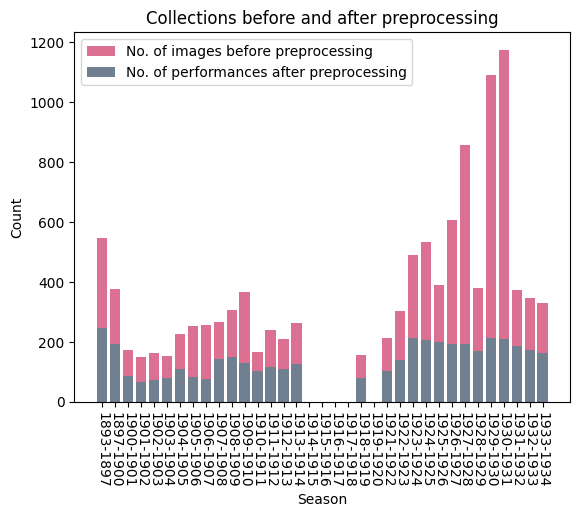

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

counts1 = df['Collection'].value_counts()[df2['Collection'].unique()].sort_index()
counts2 = df2['Collection'].value_counts().sort_index()

counts2.loc['1914-1915'] = 0
counts2.loc['1915-1916'] = 0
counts2.loc['1916-1917'] = 0
counts2.loc['1917-1918'] = 0
counts2.loc['1919-1920'] = 0

counts2 = counts2.sort_index()
x2 = counts2.index
y2 = counts2.values

# Sorting the index to ensure correct order of data points in the bar plot
counts1.loc['1914-1915'] = 0
counts1.loc['1915-1916'] = 0
counts1.loc['1916-1917'] = 0
counts1.loc['1917-1918'] = 0
counts1.loc['1919-1920'] = 0

counts1 = counts1.sort_index()

# Generate x and y data for the bar plot
x = counts1.index
y = counts1.values

# Plotting the bar plots
ax.bar(x, y, color='palevioletred', label='No. of images before preprocessing')
ax.bar(x2, y2, color='slategrey', label='No. of performances after preprocessing')

# Adding ticks and labels to the x-axis
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=-90)

# Adding labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Collections before and after preprocessing')

# Display the bar plots
plt.legend()
plt.show()


In [ ]:
#df wordt opgeslagen.
#df2.to_csv('../Materials/KVO_META.csv', encoding = 'utf-8')